In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# pd.set_option('display.max_rows',None)

In [11]:
house_data = pd.read_csv('/content/sample_data/Bengaluru_House_Data.csv')

In [12]:
house_data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# New section

EXPLORATORY DATA ANALYSIS

In [13]:
house_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
house_data.isnull().mean()

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

In [15]:
house_data.corr()['price']

bath       0.456345
balcony    0.120355
price      1.000000
Name: price, dtype: float64

In [16]:
#here balcony has correlation with price is o.12 so i think this feature not that much valuable but due to small no of feature
# i left it as it is

In [17]:
house_data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


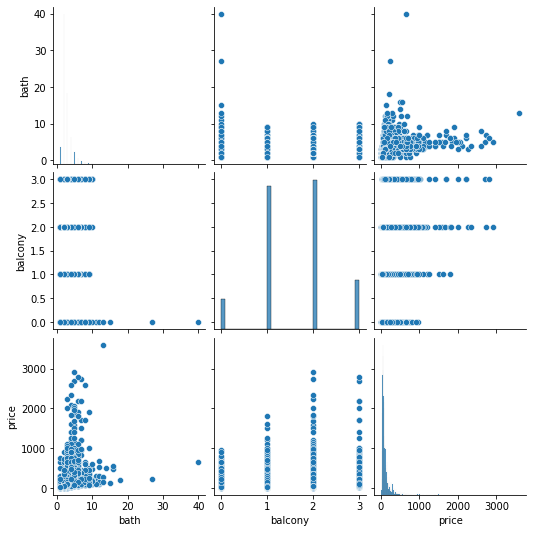

In [18]:
sns.pairplot(house_data)

DATA CLEANING

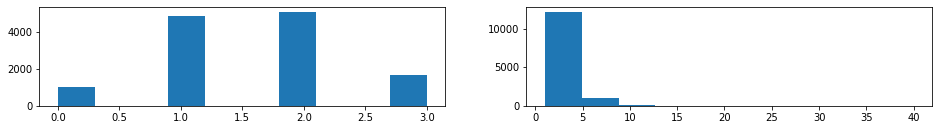

In [19]:
plt.figure(figsize=(16, 4))
plt.subplot(2,2,1,)
plt.hist(house_data.balcony)
plt.subplot(2,2,2)
plt.hist(house_data.bath)
plt.show()

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
numeric_val = house_data.select_dtypes(include=["int64", "float64",'int32'])

In [22]:
numeric_val

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


In [23]:
imputer = SimpleImputer(strategy='mean')
numeric_val_impute = imputer.fit_transform(numeric_val)

Finding Outliers

In [24]:
numeric_val_impute = pd.DataFrame(numeric_val_impute,columns=['bath_imp','balcony_imp','price_imp'])

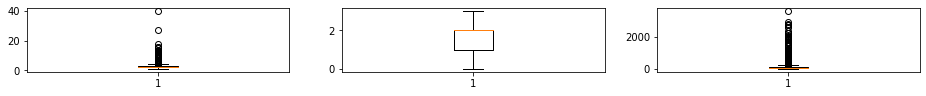

In [25]:
plt.figure(figsize=(16, 4))
plt.subplot(3,3,1)
plt.boxplot(numeric_val_impute.bath_imp)
plt.subplot(3,3,2)
plt.boxplot(numeric_val_impute.balcony_imp)
plt.subplot(3,3,3)
plt.boxplot(numeric_val_impute.price_imp)
plt.show()

In [26]:
from scipy import stats
z = np.abs(stats.zscore(numeric_val_impute))
print(z)

[[0.51775126 0.73199725 0.49337155]
 [1.72485942 1.77323081 0.04990648]
 [0.51775126 1.77323081 0.33944389]
 ...
 [0.51775126 0.73199725 0.35286977]
 [0.97732252 0.73199725 2.5202675 ]
 [1.26528816 0.73199725 0.64152608]]


In [27]:
threshold = 3
print(np.where(z > 3))

(array([    7,    45,    62,    64,    68,    85,   129,   140,   145,
         159,   193,   241,   408,   413,   434,   440,   459,   490,
         538,   605,   605,   641,   648,   677,   743,   770,   783,
         840,   855,   861,   938,  1018,  1024,  1044,  1048,  1063,
        1068,  1078,  1090,  1094,  1105,  1141,  1146,  1220,  1222,
        1234,  1299,  1299,  1311,  1314,  1352,  1379,  1400,  1405,
        1490,  1575,  1593,  1678,  1701,  1718,  1735,  1744,  1768,
        1795,  1873,  1873,  1880,  1887,  1937,  1953,  1979,  1995,
        2024,  2031,  2073,  2162,  2164,  2165,  2177,  2184,  2240,
        2286,  2341,  2400,  2439,  2439,  2519,  2552,  2620,  2620,
        2623,  2649,  2657,  2663,  2752,  2781,  2815,  2826,  2885,
        2927,  2937,  2981,  3030,  3039,  3075,  3095,  3096,  3105,
        3138,  3151,  3164,  3180,  3191,  3211,  3317,  3379,  3397,
        3425,  3437,  3440,  3460,  3511,  3523,  3527,  3539,  3609,
        3646,  3673

In [28]:
print(z[7][2])
3.375038763517309

3.2721164989295217


3.375038763517309

In [29]:
numeric_val_impute_o = numeric_val_impute[(z < 3).all(axis=1)]

In [30]:
numeric_val_impute.shape,numeric_val_impute_o.shape

((13320, 3), (12905, 3))

In [31]:
numeric_val_impute_o.isnull().sum()

bath_imp       0
balcony_imp    0
price_imp      0
dtype: int64

In [32]:
house_data_imp = pd.concat([house_data,numeric_val_impute_o],axis=1)

In [33]:
house_data_imp

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bath_imp,balcony_imp,price_imp
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4.0,1.000000,488.00


In [34]:
house_data_imp = house_data_imp.drop(['bath','balcony','price'],axis=1)

In [35]:
house_data_imp

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


In [36]:
house_data_imp.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath_imp         415
balcony_imp      415
price_imp        415
dtype: int64

In [37]:
cat_val = house_data.select_dtypes(include=['O'])

In [38]:
imputer2 = SimpleImputer(strategy='most_frequent')
cat_val_imp = imputer2.fit_transform(cat_val)
cat_val_impute = pd.DataFrame(cat_val_imp,columns=['area_type','availability','location','size','society','total_sqft'])
cat_val_impute

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200
...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689


In [39]:
final_house_data = pd.concat([cat_val_impute,numeric_val_impute_o],axis=1)

In [40]:
final_house_data

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,GrrvaGr,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


In [41]:
final_house_data.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath_imp        415
balcony_imp     415
price_imp       415
dtype: int64

In [42]:
final_house_data.shape

(13320, 9)

In [43]:
cat_val.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [44]:
cat_val.area_type.unique(),

(array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
        'Carpet  Area'], dtype=object),)

In [45]:
cat_val.availability.unique(),

(array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
        '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
        '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
        '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
        '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
        '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
        '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
        'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
        '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
        '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
        '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
        '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
        '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
        '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object),)

In [46]:
cat_val.location.unique(),

(array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
        '12th cross srinivas nagar banshankari 3rd stage',
        'Havanur extension', 'Abshot Layout'], dtype=object),)

In [47]:
cat_val.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [48]:
cat_val.society.unique(),

(array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
       dtype=object),)

In [49]:
final_house_data.size = final_house_data['size'].apply(lambda x: x.strip()[0])

In [50]:
type(final_house_data.total_sqft)

pandas.core.series.Series

In [51]:
final_house_data.size = final_house_data['size'].astype('int64')
total_sqft_int = []
for str_val in final_house_data['total_sqft']:
    try:
        total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
        except:
            
            total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan
 

In [52]:
final_house_data = final_house_data.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))

In [53]:
final_house_data

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0


In [54]:
final_house_data = final_house_data.dropna()
final_house_data.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath_imp          0
balcony_imp       0
price_imp         0
total_sqft_int    0
dtype: int64

In [55]:
type(final_house_data.size)

numpy.int64

In [56]:
type(final_house_data.balcony_imp)

pandas.core.series.Series

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
final_house_data_area_type = final_house_data.area_type
final_house_data_area_type = pd.get_dummies(final_house_data_area_type,drop_first=True)
final_house_data_area_type

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13315,0,0,0
13316,0,0,1
13317,0,0,0
13318,0,0,1


In [59]:
final_house_data.area_type.value_counts()

Super built-up  Area    8685
Built-up  Area          2335
Plot  Area              1756
Carpet  Area              85
Name: area_type, dtype: int64

In [60]:
final_house_data = final_house_data.join(pd.DataFrame(final_house_data_area_type))

In [61]:
final_house_data

,area_type,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,0
2,Built-up Area,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,1
4,Super built-up Area,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,1


In [62]:
final_house_data = final_house_data.drop('area_type',axis=1)
final_house_data

,availability,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area
0,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,1
1,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,0
2,Ready To Move,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,0
3,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,1
4,Ready To Move,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,0
13316,Ready To Move,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,1
13317,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,0
13318,18-Jun,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,1


In [63]:
final_house_data["availability_Ready To Move"] = np.where(final_house_data["availability"]=="Ready To Move",1,0)
final_house_data.shape

(12861, 13)

In [64]:
final_house_data = final_house_data.drop('availability',axis=1)

In [65]:
location_value_count = final_house_data.location.value_counts()
location_value_count

Whitefield                  528
Sarjapur  Road              389
Electronic City             300
Kanakpura Road              271
Thanisandra                 232
                           ... 
Doctor Layout Rayasandra      1
Vijayabank bank layout        1
5th block Koramangala         1
Kanakapura  Rod               1
Allalasandra                  1
Name: location, Length: 1261, dtype: int64

In [66]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Marathahalli', 'Hebbal',
       'Raja Rajeshwari Nagar',
       ...
       'Kathriguppe', 'Hoskote', 'Domlur', 'Gunjur', 'Binny Pete',
       'Basaveshwara Nagar', 'HBR Layout', 'Poorna Pragna Layout',
       'Yelachenahalli', 'Sanjay nagar'],
      dtype='object', length=146)

In [67]:
for cat_var in location_gert_20:
    final_house_data['location_'+cat_var]=np.where(final_house_data['location']==cat_var, 1,0)

In [68]:
final_house_data

,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Thanisandra,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Hebbal,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Bannerghatta Road,location_7th Phase JP Nagar,location_Haralur Road,location_Electronic City Phase II,location_Chandapura,location_Rajaji Nagar,location_Bellandur,location_Electronics City Phase 1,location_KR Puram,location_Yeshwanthpur,location_Hoodi,location_Begur Road,location_Sarjapur,location_Harlur,location_Kasavanhalli,location_Banashankari,location_Hormavu,...,location_Horamavu Banaswadi,location_Singasandra,location_Gubbalala,location_Bommasandra Industrial Area,location_Choodasandra,location_Kumaraswami Layout,location_Anandapura,location_Margondanahalli,location_Kothannur,location_Magadi Road,location_Banashankari Stage III,location_Babusapalaya,location_Iblur Village,location_Kodichikkanahalli,location_Ardendale,location_Seegehalli,location_Battarahalli,location_Amruthahalli,location_Kambipura,location_Abbigere,location_6th Phase JP Nagar,location_EPIP Zone,location_Lingadheeranahalli,location_Sonnenahalli,location_Thubarahalli,location_Kaval Byrasandra,location_Rayasandra,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_Kogilu,location_Kathriguppe,location_Hoskote,location_Domlur,location_Gunjur,location_Binny Pete,location_Basaveshwara Nagar,location_HBR Layout,location_Poorna Pragna Layout,location_Yelachenahalli,location_Sanjay nagar
0,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13316,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
society_value_count = final_house_data.society.value_counts()

In [70]:
society_value_grt20 = society_value_count[society_value_count>=20].index
society_value_grt20

Index(['GrrvaGr', 'PrarePa', 'Sryalan', 'Prtates', 'GMown E', 'Prtanha',
       'Bhmesy ', 'Prityel', 'Prarkun', 'PrityTr', 'Dhalsh ', 'IBityin',
       'SNity S', 'Soresea', 'Rosha I', 'Soitya ', 'Bhe 2ko', 'SunceEs',
       'SNnia E', 'Adeatlm', 'JRrnauv', 'MenueNo', 'Prlla C', 'PuandHi',
       'Prncyrn', 'RothaVa', 'Aklia R', 'Puachal', 'Raard B', 'GoAirej',
       'PhestOn', 'Soazak ', 'DLhtsnd', 'Itelaa ', 'Dieldli', 'PualeSk',
       'ViistLa', 'Sodgere', 'Shitt S', 'Brnia G', 'Soiewre', 'Prrtht ',
       'RInceeg', 'DLhtsan', 'SoechHa', 'AsastDe', 'Brway G', 'Shthi S',
       'DLhtsen', 'Eladero'],
      dtype='object')

In [71]:
for cat_var in society_value_grt20:
    final_house_data['society'+cat_var]=np.where(final_house_data['society']==cat_var, 1,0)

In [72]:
final_house_data

,location,size,society,total_sqft,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Thanisandra,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Hebbal,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Bannerghatta Road,location_7th Phase JP Nagar,location_Haralur Road,location_Electronic City Phase II,location_Chandapura,location_Rajaji Nagar,location_Bellandur,location_Electronics City Phase 1,location_KR Puram,location_Yeshwanthpur,location_Hoodi,location_Begur Road,location_Sarjapur,location_Harlur,location_Kasavanhalli,location_Banashankari,location_Hormavu,...,societyDhalsh,societyIBityin,societySNity S,societySoresea,societyRosha I,societySoitya,societyBhe 2ko,societySunceEs,societySNnia E,societyAdeatlm,societyJRrnauv,societyMenueNo,societyPrlla C,societyPuandHi,societyPrncyrn,societyRothaVa,societyAklia R,societyPuachal,societyRaard B,societyGoAirej,societyPhestOn,societySoazak,societyDLhtsnd,societyItelaa,societyDieldli,societyPualeSk,societyViistLa,societySodgere,societyShitt S,societyBrnia G,societySoiewre,societyPrrtht,societyRInceeg,societyDLhtsan,societySoechHa,societyAsastDe,societyBrway G,societyShthi S,societyDLhtsen,societyEladero
0,Electronic City Phase II,2,Coomee,1056,2.0,1.000000,39.07,1056.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4,Theanmp,2600,5.0,3.000000,120.00,2600.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,GrrvaGr,1440,2.0,3.000000,62.00,1440.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,Soiewre,1521,3.0,1.000000,95.00,1521.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Kothanur,2,GrrvaGr,1200,2.0,1.000000,51.00,1200.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5,ArsiaEx,3453,4.0,0.000000,231.00,3453.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13316,Richards Town,4,GrrvaGr,3600,5.0,1.584376,400.00,3600.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13317,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.000000,60.00,1141.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4,SollyCl,4689,4.0,1.000000,488.00,4689.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
final_house_data = final_house_data.drop(['location','society','total_sqft'],axis=1)

In [74]:
final_house_data

,size,bath_imp,balcony_imp,price_imp,total_sqft_int,Carpet Area,Plot Area,Super built-up Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Kanakpura Road,location_Thanisandra,location_Yelahanka,location_Uttarahalli,location_Marathahalli,location_Hebbal,location_Raja Rajeshwari Nagar,location_Hennur Road,location_Bannerghatta Road,location_7th Phase JP Nagar,location_Haralur Road,location_Electronic City Phase II,location_Chandapura,location_Rajaji Nagar,location_Bellandur,location_Electronics City Phase 1,location_KR Puram,location_Yeshwanthpur,location_Hoodi,location_Begur Road,location_Sarjapur,location_Harlur,location_Kasavanhalli,location_Banashankari,location_Hormavu,location_Kengeri,location_Jakkur,location_JP Nagar,...,societyDhalsh,societyIBityin,societySNity S,societySoresea,societyRosha I,societySoitya,societyBhe 2ko,societySunceEs,societySNnia E,societyAdeatlm,societyJRrnauv,societyMenueNo,societyPrlla C,societyPuandHi,societyPrncyrn,societyRothaVa,societyAklia R,societyPuachal,societyRaard B,societyGoAirej,societyPhestOn,societySoazak,societyDLhtsnd,societyItelaa,societyDieldli,societyPualeSk,societyViistLa,societySodgere,societyShitt S,societyBrnia G,societySoiewre,societyPrrtht,societyRInceeg,societyDLhtsan,societySoechHa,societyAsastDe,societyBrway G,societyShthi S,societyDLhtsen,societyEladero
0,2,2.0,1.000000,39.07,1056.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,5.0,3.000000,120.00,2600.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2.0,3.000000,62.00,1440.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3.0,1.000000,95.00,1521.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,2.0,1.000000,51.00,1200.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5,4.0,0.000000,231.00,3453.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13316,4,5.0,1.584376,400.00,3600.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13317,2,2.0,1.000000,60.00,1141.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13318,4,4.0,1.000000,488.00,4689.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
final_house_data.corr()['price_imp']

size              0.543265
bath_imp          0.620198
balcony_imp       0.141958
price_imp         1.000000
total_sqft_int    0.553911
                    ...   
societyAsastDe   -0.019915
societyBrway G    0.068236
societyShthi S   -0.024969
societyDLhtsen   -0.020829
societyEladero    0.009475
Name: price_imp, Length: 205, dtype: float64

In [76]:
final_house_data.to_csv('reduce_cat_class.csv', index=False) 

# Building model

In [124]:
label = final_house_data.price_imp
feature = final_house_data.drop('price_imp',axis=1)

In [125]:
from sklearn.model_selection import train_test_split

In [127]:
label_train,label_test,feature_train,feature_test = train_test_split(label,feature,test_size=0.2,random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
feature_train = scale.fit_transform(feature_train)
feature_test = scale.transform(feature_test)

In [129]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [130]:
model = LinearSVR()
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [131]:
model.score(feature_test,label_test)

0.2594970821687067

In [132]:
model2 = RandomForestRegressor()
model2.fit(feature_train,label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
model2.score(feature_test,label_test)

0.7062720024665061

In [134]:
model3 = KNeighborsRegressor()
model3.fit(feature_train,label_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [135]:
model3.score(feature_test,label_test)

0.6514727752923664

In [136]:
model4 = DecisionTreeRegressor()
model4.fit(feature_train,label_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [137]:
model4.score(feature_test,label_test)

0.47709094522963363

In [138]:
model5 = GradientBoostingRegressor()
model5.fit(feature_train,label_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
model5.score(feature_test,label_test)

0.7188132836594382

In [140]:
model6 = AdaBoostRegressor()
model6.fit(feature_train,label_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [141]:
model6.score(feature_test,label_test)

0.5812000371341081

In [142]:
from sklearn.linear_model import LinearRegression
model7 = LinearRegression()
model7.fit(feature_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
model7.score(feature_test,label_test)

0.5351451774747313

In [144]:
models = [model,model2,model3,model4,model5,model6,model7]
accuracy= []
for model in models:
    accuracy.append(model.score(feature_test,label_test))
    

In [145]:
accuracy

[0.2594970821687067,
 0.7062720024665061,
 0.6514727752923664,
 0.47709094522963363,
 0.7188132836594382,
 0.5812000371341081,
 0.5351451774747313]

In [146]:
#Here best model is model 5 with accuracy is around 72%

# Hyperparameter Tunning

In [147]:
from sklearn.model_selection import GridSearchCV
gd = GradientBoostingRegressor()
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07],
              'max_depth': [4, 6, 8], 
              'subsample': [0.7,1,0.9],
              'n_estimators': [100,300,500]}
model5_hp = GridSearchCV(gd,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

In [148]:
model5_hp.fit(feature_train,label_train)

print(model5_hp.best_score_) 
print(model5_hp.best_params_)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 31.3min finished


0.7236053846468826
{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}


In [149]:
model5_hp.score(feature_test,label_test)

0.7462052606913199

In [150]:
import joblib
joblib.dump(model5_hp, 'bangalore_house_price_prediction_model.pkl')

['bangalore_house_price_prediction_model.pkl']